## How well do jobs and skills pay for Data Analysts?

Methology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skill

In [19]:
#importing libraries 

import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [75]:
#filter specific country 
country = 'France'

df_country = df[df['job_country']== country].dropna(subset='salary_year_avg')

In [76]:
job_titles = df_country['job_title_short'].value_counts().index[:6].tolist()
df_top6 = df_country[df_country['job_title_short'].isin(job_titles)]
job_order = df_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

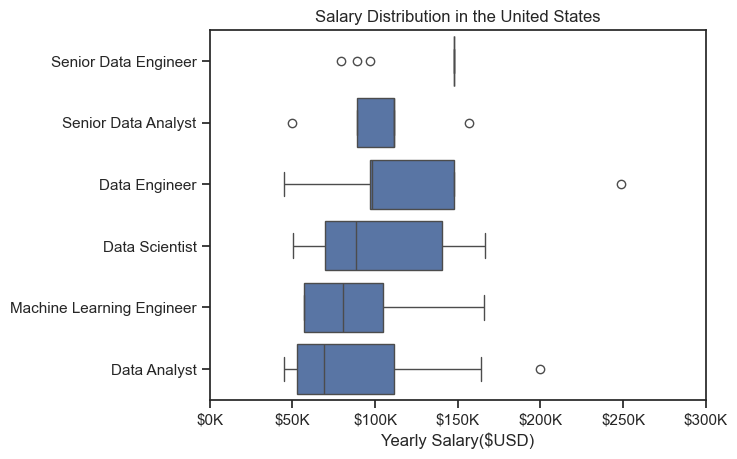

In [85]:
sns.boxplot(data=df_top6,x='salary_year_avg',y='job_title_short',order=job_order)
sns.set_theme(style='ticks')
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.xlim(0,300000)
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts

In [78]:
title = 'Data Analyst'
df_job_country = df[(df['job_country']== country) & (df['job_title_short'] == title)].copy()

df_job_country = df_job_country.dropna(subset='salary_year_avg')

In [79]:
df_job_country = df_job_country.explode('job_skills')

df_job_country[['salary_year_avg' , 'job_skills']].head(5)

,salary_year_avg,job_skills
12526,111175.0,power bi
12526,111175.0,sharepoint
12526,111175.0,excel
33317,56700.0,scala
33317,56700.0,sql


In [80]:
#top paying skills
df_top_pay = df_job_country.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)

df_top_pay = df_top_pay.head(10)

df_top_pay

,count,median
job_skills,,
c,1,200000.0
terraform,1,163782.0
gitlab,1,163782.0
neo4j,1,111175.0
php,1,111175.0
kafka,3,111175.0
nosql,1,111175.0
vba,3,111175.0
sharepoint,1,111175.0


In [81]:
#most popular skills
df_top_popular = df_job_country.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_top_popular = df_top_popular.head(10).sort_values(by='median',ascending=False)

df_top_popular

,count,median
job_skills,,
excel,8,96012.5
python,20,94800.0
power bi,8,92925.0
sql,28,89100.0
aws,5,89100.0
snowflake,5,89100.0
azure,9,80850.0
spark,5,80850.0
airflow,5,57500.0


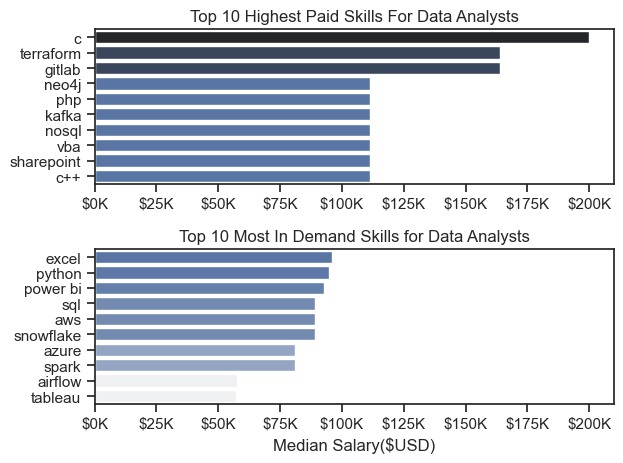

In [82]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style='ticks')

# top paying skills
#df_DA_top_pay.plot(kind='barh',y='median',ax=ax[0],legend=False)
sns.barplot(data=df_top_pay, x='median',y= df_top_pay.index,hue='median',ax=ax[0],palette='dark:b_r')
#ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills For Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax[0].legend().remove()

# top popular skills
#df_DA_skills.plot(kind='barh', y='median', ax=ax[1],legend=False)
sns.barplot(data=df_top_popular, x='median',y= df_top_popular.index,hue='median',ax=ax[1],palette='light:b')
#ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax[1].legend().remove()


fig.tight_layout()
